# Feature Selection & Dimension Reduction

**Contributions from: Eric Elmoznino, Jeremy Eng**

Today, we'll be looking at ways to reduce the complexity of our data sets by 

1.   Cutting Down on the number of features we use [Filter and Wrapper Methods]
2.   Transforming the number of features by writing them as a  linear combination [**PCA (Principal Component Analysis)** and **LDA (Linear Discriminant Analysis)**]


##Filter Methods

Give each feature a “score” that represents how “important” it is.

Scores can be based on:



1.   Correlation with target variable
2.   High/low variance (High variance means it probably has more weight)
3.   Feature similarity (correlation between features)

Keep features with high scores, discard features with low scores.



Advantages:



1.   Fast—no training involved, just calculations (Simple Hypothesis Test Used)

Disadvantages:



1.   Can ignore feature combinations
2.   May keep redundant features


## Wrapper Methods

Train model multiple times with different combinations of subsets of features.

Goal is to find the “best” subset of features.

Advantages:



1.   Evaluates features in context of others
2.   Performance-driven


Disadvantages:



1.   Slow (must re-train model each time)


Popular wrapper methods:



1.   Forward selection
2.   Backward selection
3.   Stepwise selection


### Forward Selection 
<br>
<img src = 'https://quantifyinghealth.com/wp-content/uploads/2019/10/forward-stepwise-algorithm.png'>


### Backward Selection 
<br>
<img src = 'https://quantifyinghealth.com/wp-content/uploads/2019/10/backward-stepwise-algorithm.png'>

### Stepwise Selection

A combination of Forward and Backward Selection.



1.   SelectedFeatures = [ ]
2.   Perform Forward Selection
3.   Perform Backward Selection
4.   Repeat 2. and 3. until a final optimal set of features is obtained.

Can alternatively start with SelectedFeatures = AllFeatures, or somewhere in between.


In [25]:
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

data = load_linnerud()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [26]:
x = df.to_numpy()
y = data.target
y = y[:, 1]

est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.771
Method:                 Least Squares   F-statistic:                              23.45
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                    2.83e-06
Time:                        19:06:52   Log-Likelihood:                         -83.423
No. Observations:                  20   AIC:                                      172.8
Df Residuals:                      17   BIC:                                      175.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2759      1.024      0.269      0.791      -1.885       2.436
x2             0.1919      0.084      2.278      0.036       0.014       0.370
x3            -0.0154      0.102     -0.151      0.882      -0.231       0.200
==============================================================================
Omnibus:                        0.745   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.683
Skew:                           0.110   Prob(JB):                        0.711
Kurtosis:                       2.122   Cond. No.                         47.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
##Your Turn

from sklearn.datasets import load_boston

boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
y = load_boston().target

X = sm.add_constant(boston)
sm.OLS(y, X).fit().summary()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        19:14:05   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [45]:
new_boston = boston.drop([ 'CHAS'], axis = 1)

In [46]:
y = load_boston().target

X = sm.add_constant(new_boston)
sm.OLS(y, X).fit().summary()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          7.30e-134
Time:                        19:15:00   Log-Likelihood:                -1503.8
No. Observations:                 506   AIC:                             3034.
Df Residuals:                     493   BIC:                             3088.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.8920      5.147      7.168      0.000      26.780      47.004
CRIM          -0.1131      0.033     -3.417      0.001      -0.178      -0.048
ZN             0.0471      0.014      3.398      0.001       0.020       0.074
INDUS          0.0403      0.062      0.653      0.514      -0.081       0.162
NOX          -17.3670      3.851     -4.509      0.000     -24.934      -9.800
RM             3.8505      0.421      9.137      0.000       3.023       4.678
AGE            0.0028      0.013      0.209      0.834      -0.023       0.029
DIS           -1.4854      0.201     -7.383      0.000      -1.881      -1.090
RAD            0.3283      0.067      4.934      0.000       0.198       0.459
TAX           -0.0138      0.004     -3.653      0.000      -0.021      -0.006
PTRATIO       -0.9910      0.131     -7.542      0.000      -1.249      -0.733
B              0.0097      0.003      3.600      0.000       0.004       0.015
LSTAT         -0.5342      0.051    -10.459      0.000      -0.635      -0.434
==============================================================================
Omnibus:                      190.856   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              898.352
Skew:                           1.619   Prob(JB):                    8.42e-196
Kurtosis:                       8.668   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## PCA (Principal Component Analysis)

Idea: represent many variables with fewer variables while minimizing loss of information

Simplest case: represent two variables as a single variable
How would you do this?

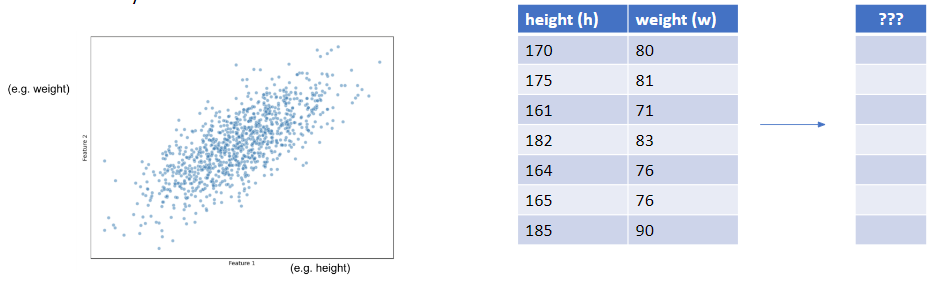


We can use a linear combination of our two variables to transform our two variables into a single variable (size).


ah + bw = s  (line)

Can think of it as a “projection”

How do we choose a and b?
Graphically, we want to create a “best-fit” line that passes through the mean of each variable.
By “best-fit”, we mean the perpendicular distance from the points to the line is minimized.

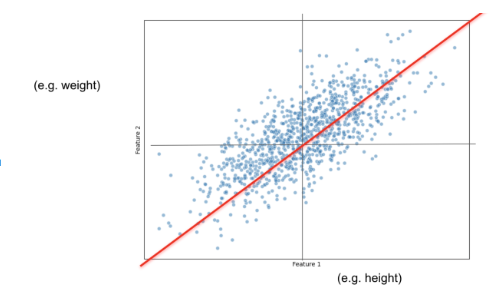

Can also think of this line as going in the direction of MOST variation.
This line we found is referred to as Principal Component 1 (PC1).


What if we have d variables and want to reduce down to k variables?

Turns out, we just need to find the first k principal components!

Let’s discuss principal components more!

For each dimension (variable/feature) in our data, we also have that many principal components.

E.g. if we have two variables, there are two principal components (we just found the first one in the last example).

E.g. if we have 100 variables, there are 100 principal components.

We showed how to find PC1, but how do we find PC2, PC3, etc.?
Remember that PC1 was a “best-fit” line in the direction of MOST variation.
PC2 will be in the direction of the next most variation, following a few rules:
Must pass through the mean of each variable
Must be perpendicular/orthogonal to all other previous principal components.
Following these rules, PC2, PC3, …, PCk can be found in order!
This way, we are keeping the principal components that have the most variation!



More Details Here:
https://www.youtube.com/watch?v=FgakZw6K1QQ

Math Behind PCA:
https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643

More On Eigenvectors/Values:
https://medium.com/analytics-vidhya/eigenvectors-and-eigenvalues-and-there-use-in-principal-component-analysis-machine-learning-1f97fdbdb303

Another way to think of PCA is performing a change of basis

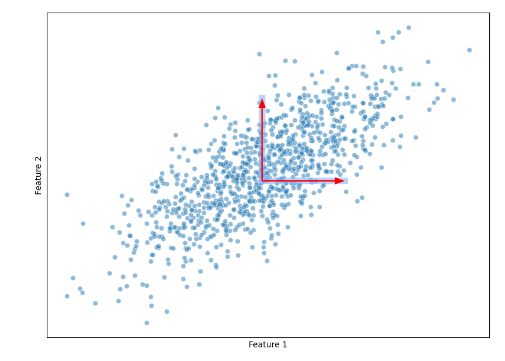

#### PCA: Choosing the New Dimension
We can plot the cumulative explained variance to choose an optimal new dimension (i.e. number of principal components to keep).

Shows how much variance is explained by each PC.

Strategy: Keep number of PCs up to a certain % of total variance explained.

Strategy: Elbow method

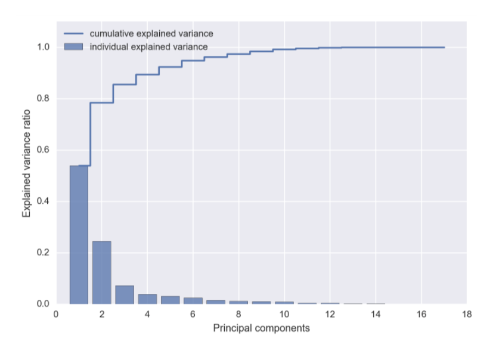

## Summary

We start with data consisting of n observations and d dimensions 

Want to reduce down to n observations and k (< d) dimensions

PCA creates principal components (PCs)

d vectors that represent:

A series of orthogonal “best-fit” vectors

A series of orthogonal vectors that point in the direction of most variance

When data is projected onto a PC, it gives one number.

Keep first k PCs

Done mathematically through matrix multiplication (python: sklearn)

Eigenvalues of covariance matrix: importance of PC

Eigenvectors of covariance matrix: direction of PC

Important to scale data prior to PCA (since it’s based on variance)
*StandardScaler*


In [7]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [8]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)

     principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
..                     ...                    ...
145               1.870522               0.382822
146               1.558492              -0.905314
147               1.520845               0.266795
148               1.376391               1.016362
149               0.959299              -0.022284

[150 rows x 2 columns]


In [10]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

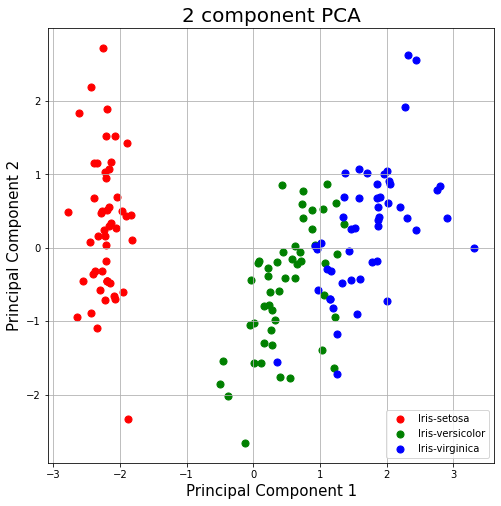

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## PCA Eigenfaces Demo

Dataset shape: (1348, 2914)


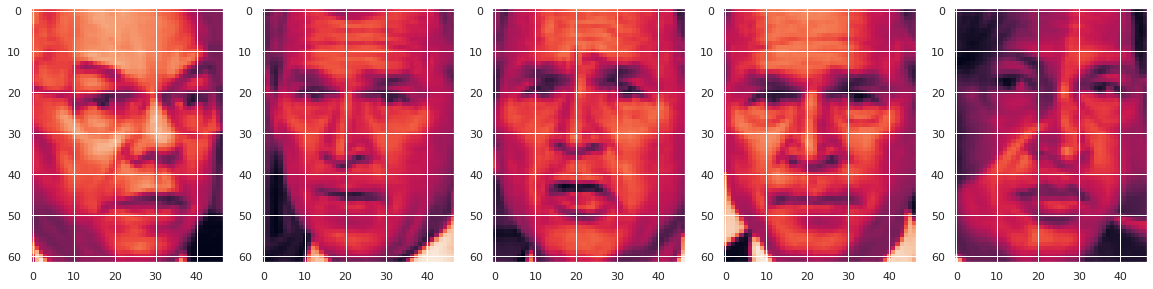

In [12]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Import the LFW people image dataset from skleaern
faces = fetch_lfw_people(min_faces_per_person=60).data
print('Dataset shape: {}'.format(faces.shape))

# Show the first 5 faces in the dataset
_, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(faces[i].reshape((62, 47))) #62x47 = 2914 features (contains grayscale value)

In [13]:
from sklearn.decomposition import PCA

# Find the first 75 principle components of the dataset
pca = PCA(n_components=75)
#pca = PCA()
pca.fit(faces)

# Transform the data to its low-dimensional representation
reduced_faces = pca.transform(faces)
print('Low-dimensional dataset shape: {}'.format(reduced_faces.shape))

Low-dimensional dataset shape: (1348, 75)


Text(0, 0.5, '% Cumulative explained variance')

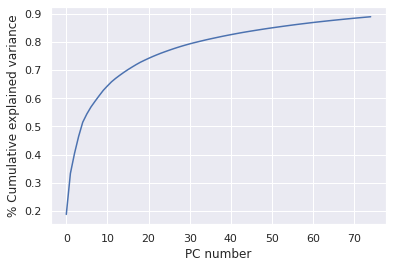

In [14]:
# See how well PCs explain variance in the dataset
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('PC number')
plt.ylabel('% Cumulative explained variance')

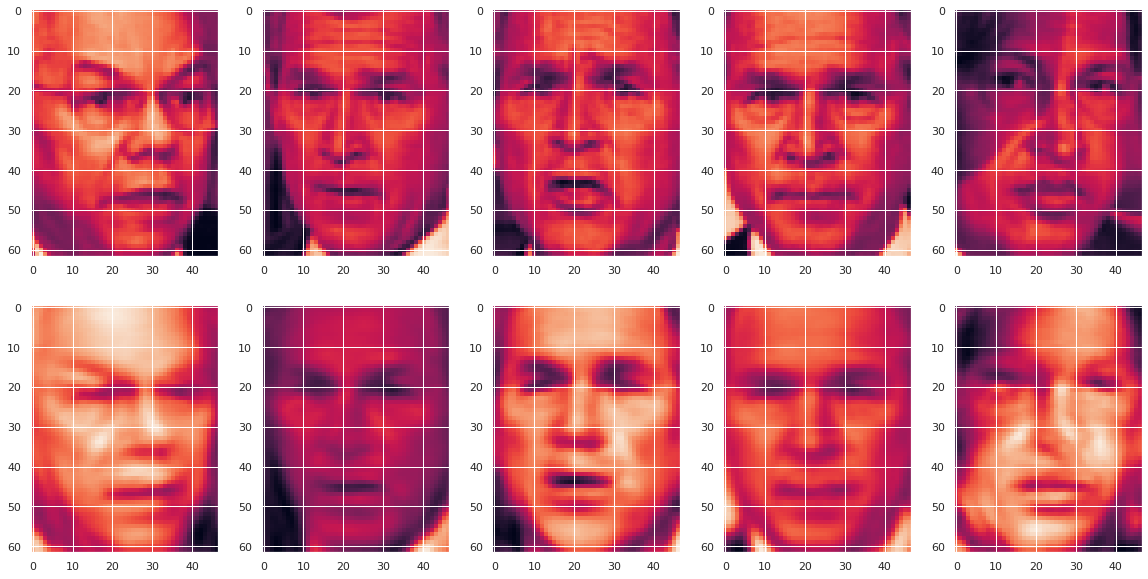

In [15]:
# See how much information the PCs preserve
reconstructed_faces = pca.inverse_transform(reduced_faces)

# Show the first 5 faces in the dataset and their reconstructions
_, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(5):
    axes[0, i].imshow(faces[i].reshape((62, 47)))
    axes[1, i].imshow(reconstructed_faces[i].reshape((62, 47)))

PC matrix shape: (75, 2914)


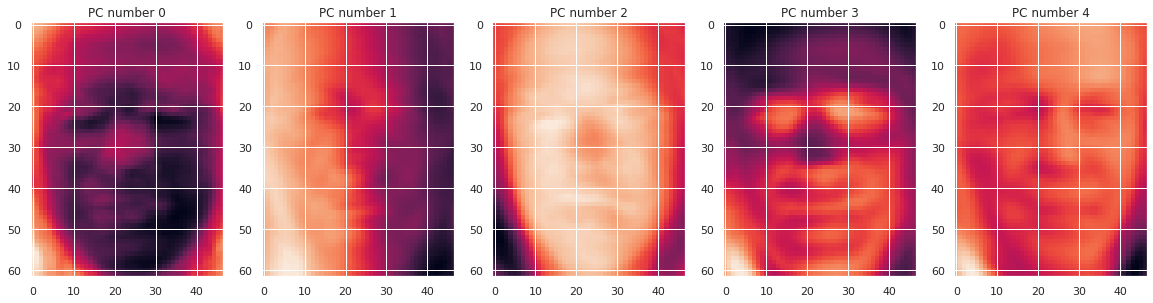

In [16]:
# Get the actual PCs from the sklearn PCA model
pcs = pca.components_
print('PC matrix shape: {}'.format(pcs.shape))

# Inspect the first 5 PCs
_, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.imshow(pcs[i].reshape((62, 47)))
    ax.set_title('PC number {}'.format(i))

### Our original features were image pixels. Our low-dimensional features (PCs) correspond to... face-related concepts!
This helps us learn what the important factors that describe faces (and how they primarily vary).

For example, individual PCs might correspond to:
- wide vs. narrow face
- eyes closed/open
- smiling/not smiling
- etc.



# Take-home exercise
Try and find out what PC 1 represents by finding images that have high values along it and other images that have low ones. Often, just inspecting the polarity of the PC can tell you what it does.

## LDA (Linear Discriminant Analysis)


Difference: uses the class label when choosing “PCs” (PC equivalents).
LDA is supervised, PCA is unsupervised

LDA aims to:



1.   Minimize “intra-class” variance
2.   Maximize “inter-class” variance



LDA can only be done for classification.
Target variable is categorical

https://www.youtube.com/watch?v=azXCzI57Yfc


In [47]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
sns.set(style='whitegrid', context='talk')

In [48]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

target_names = iris.target_names
feature_names = ['sepal length in cm', 
                 'sepal width in cm', 
                 'petal length in cm', 
                 'petal width in cm']

In [49]:
df = pd.DataFrame(X, columns=feature_names)
df['class'] = target_names[y]

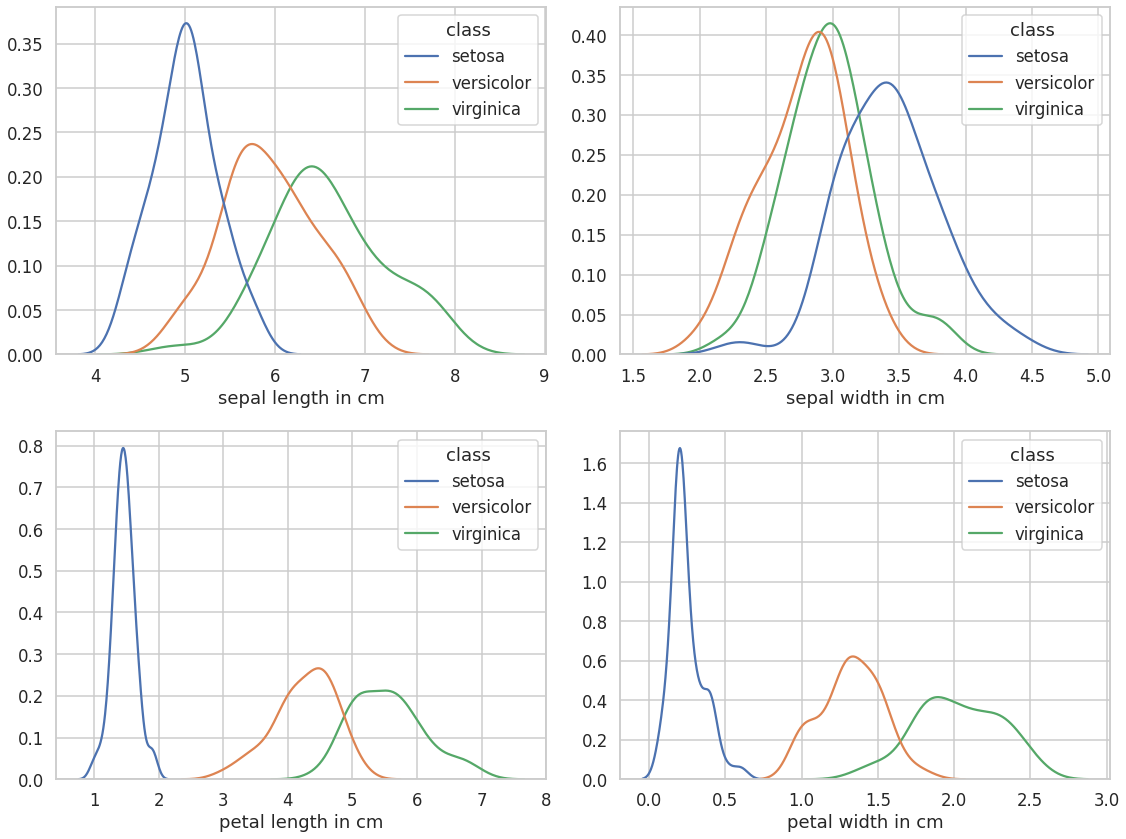

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
for i in range(2):
    for j in range(2):
        sns.kdeplot(hue='class', x=feature_names[i*2 + j], data=df, ax=axs[i, j])
        axs[i, j].set_ylabel('')

fig.tight_layout()

In [21]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_reduced = lda.transform(X)

In [22]:
lda_feature_names = ['LDA dim=1', 'LDA dim=2']

df_reduced = pd.DataFrame(X_reduced, columns=lda_feature_names)
df_reduced['class'] = target_names[y]

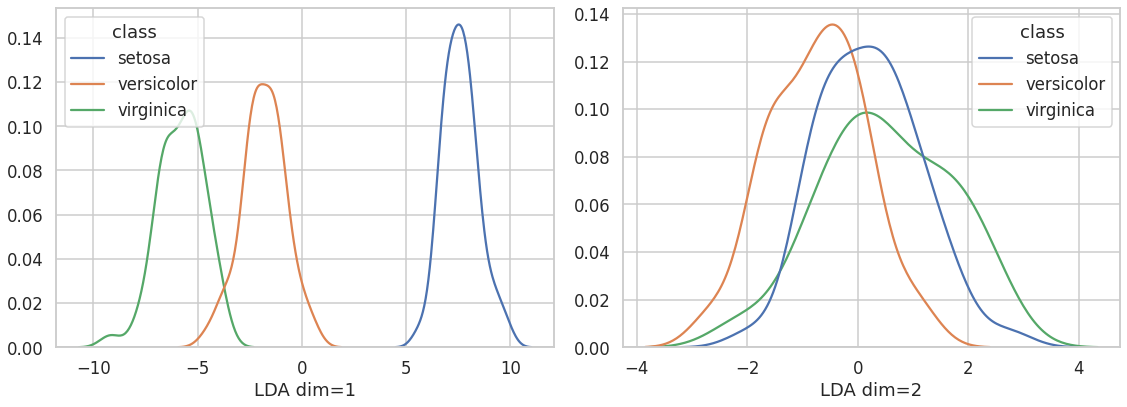

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for i in range(2):
    sns.kdeplot(hue='class', x=lda_feature_names[i], data=df_reduced, ax=axs[i])
    axs[i].set_ylabel('')
        
fig.tight_layout()

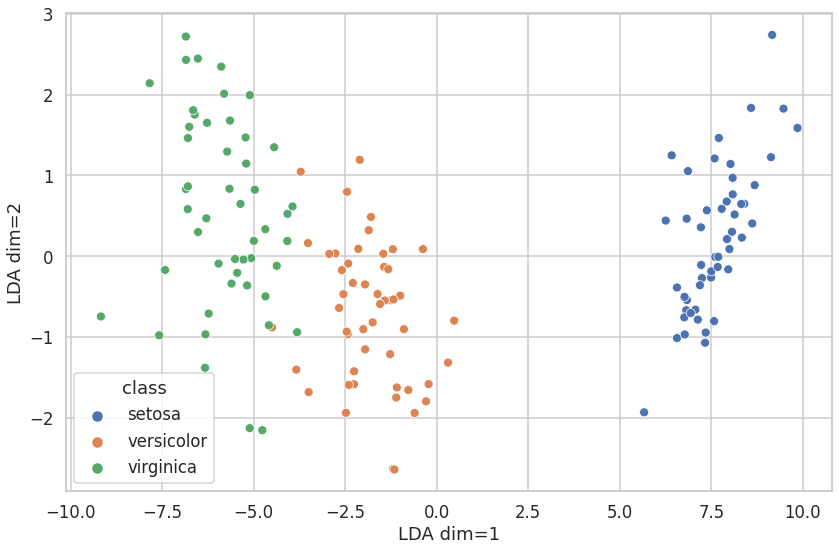

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=lda_feature_names[0], y=lda_feature_names[1], hue='class', data=df_reduced, ax=ax)

fig.tight_layout()

# Take-home exercise
Try and run LDA on the linearrud data set above by first breaking groups into underweight, normal weight and overweight categories and run a visualization.